# Support Vector Classsifier in Scikit-learn

In [5]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

In [6]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
# the digits dataset
digits = datasets.load_digits()

The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 4 images, stored in the `images` attribute of the dataset. If we were working from image files, we could load them using matplotlib.pyplot.imread. Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

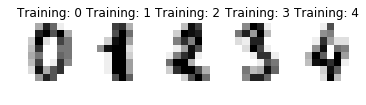

In [8]:
images_and_labels = list(zip(digits.images,digits.target))
for index, (image,label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Training: %i' % label)
    

In [9]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

nSamples = len(digits.images)
data = digits.images.reshape((nSamples,-1))

In [10]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma= 0.0001)
# We learn the digits on the first half of the digits
classifier.fit(data[:nSamples //2],digits.target[:nSamples //2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Now predict the value of the digit on the second half:
expected = digits.target[nSamples // 2:]
predicted = classifier.predict(data[nSamples //2:])

In [12]:
print("classification report for classifier %s:\n%s\n"
      %(classifier,metrics.classification_report(expected,predicted)))

classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.95      0.90      0.93        91
           2       1.00      0.94      0.97        86
           3       0.95      0.87      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.96      0.93        91
           6       0.99      0.99      0.99        91
           7       0.92      0.98      0.95        89
           8       0.92      0.89      0.90        88
           9       0.83      0.95      0.88        92

   micro avg       0.94      0.94      0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94

confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  0  0  0  1  0  0  0  8]
 [ 1  0 81  2  0  0  0  0  0  2]
 [ 0  0  0 79  0  4  0  4  4  0]
 [ 0  0  0  0 87  0  0  1  2  2]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 87  1  0]
 [ 0  3  0  1  0  2  0  1 78  3]
 [ 0  0  0  1  0  2  0  2  0 87]]


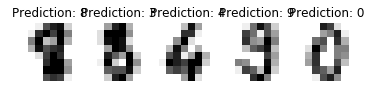

In [13]:
ConfusionMatrix = metrics.confusion_matrix(expected, predicted)
ttt = ConfusionMatrix
print("confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[nSamples //2:],predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(2, 5, index + 6)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()